# Shape measures

Mesurer la géométrie, en particulier sur les objets linéraires, peut-être utile (étudier la qualité, comparer les formes, etc.) et est toujours abordé dans la littérature. 

- Les mesures intrinsèques qui concernent la géométrie de la ligne
- Shape measures to describe the similarity of polygons 

## Let's start by defining our environment

The first task is only useful for the online notebook

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)


The following imports are necessary for all of the examples.

In [2]:
# Matplotlib to create visualizations
import matplotlib.pyplot as plt

# Import tracklib library
import tracklib as tkl

## Hausdorff distance between two tracks

## Mesures de caractérisation des lignes

La comparaison directe des géométries de la ligne originale et de son homologue généralisé. Quantifier l'écart positionnel produit par la généralisation.



7.5 7.5
index max: 3
8 8


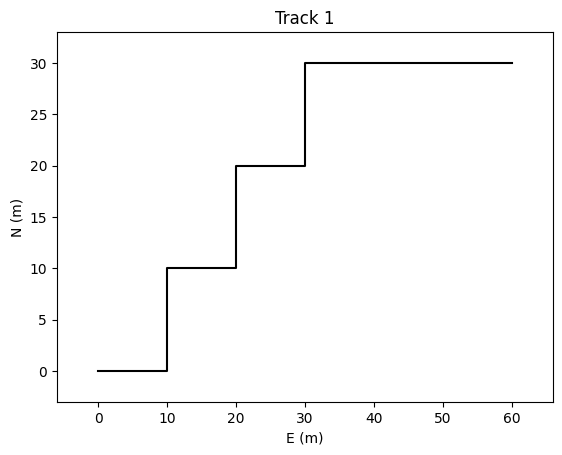

In [3]:
tkl.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
trace1 = tkl.Track([], 1)

trace1.addObs(tkl.Obs(tkl.ENUCoords(0, 0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:00")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(10, 0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:12")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(10, 10, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:40")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(20, 10, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:01:50")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(20, 20, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:02:10")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(30, 20, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:02:35")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(30, 30, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:02:43")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(40, 30, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:02:55")))
trace1.addObs(tkl.Obs(tkl.ENUCoords(60, 30, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:03:25")))
        
trace1.plot('k-')
        
# 25%
borneinf = min(int(trace1.bbox().getDx()), int(trace1.bbox().getDy())) / 4 
print(borneinf, 7.5)
        
ind1 = tkl.compareWithDouglasPeuckerSimplification(trace1, borneinf)
print(ind1, 8)

### compareWithDouglasPeuckerSimplification

retourne le nombre de points de la ligne la plus généralisée 
    avec Douglas Peucker et qui respecte une qualité donnée avec threshold.

### averageOffsetDistance

## Radial distance

Radial signature and radial distance. The source code to compute radial signature and radial distance are detailed in:

<div class="alert alert-block alert-warning" style="padding:1em">
Yann Méneroux, Ibrahim Maidaneh Abdi, Arnaud Le Guilcher, Ana-Maria Olteanu-Raimond. Is the radial distance really a distance? An analysis of its properties and interest for the matching of polygon features. International Journal of Geographical Information Science, 2023, 37 (2), pp.438 - 475. ⟨10.1080/13658816.2022.2123487⟩. ⟨hal-03790024⟩</div>

Datasets and scripts for radial distance analysis are available on Zenodo: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7006944.svg)](https://doi.org/10.5281/zenodo.7006944)

Radial distance between two simple building polygons:  0.0915944791404684


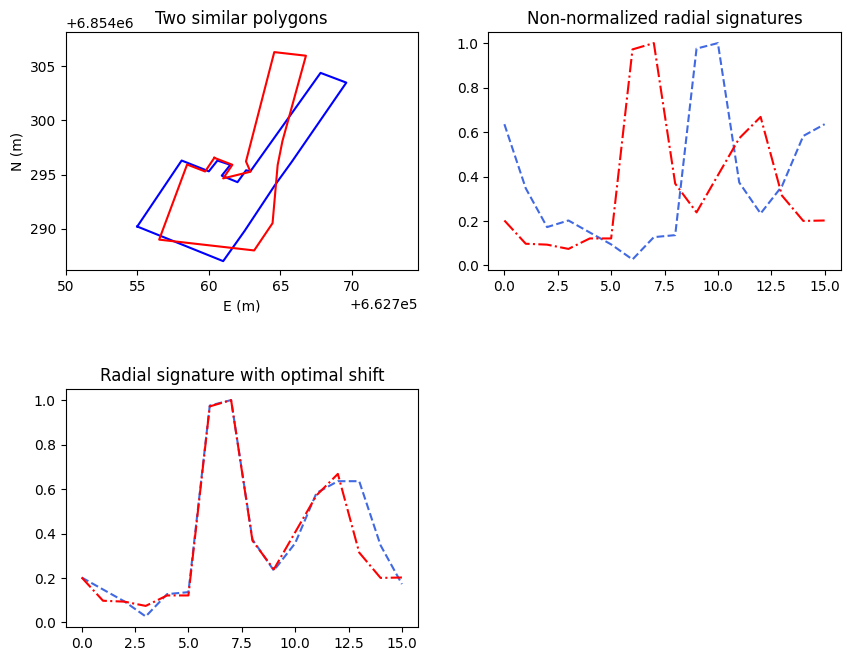

In [4]:
import math
TRACES = tkl.TrackReader.readFromWkt("../../../data/wkt/twobatis.wkt", id_geom=0,
                             separator="#", h=1, doublequote=False)

bati1 = TRACES[0]
bati2 = TRACES[1]
C = bati2.getEnclosedPolygon().centroid()
bati2.rotate(math.pi/10, tkl.ENUCoords(C[0], C[1]))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1.3, wspace=0.2, hspace=0.5)

# ------------------------------------------------------------
# 
ax1 = plt.subplot2grid((2, 2), (0, 0))

bati1.plot('b-', append=ax1)
bati2.plot('r-', append=ax1)
plt.xlim([bati1.bbox().getXmin()-5, bati1.bbox().getXmax()+5])
plt.title('Two similar polygons')

# ------------------------------------------------------------
ax2 = plt.subplot2grid((2, 2), (0, 1))

sign1 = tkl.computeRadialSignature(bati1)
R1 = sign1.getAnalyticalFeature('r')
plt.plot(R1, color="royalblue", linestyle='--')

sign2 = tkl.computeRadialSignature(bati2)
R2 = sign2.getAnalyticalFeature('r')
plt.plot(R2, color="red", linestyle='-.')

plt.title('Non-normalized radial signatures')

# ------------------------------------------------------------
ax3 = plt.subplot2grid((2, 2), (1, 0))

# radial distance unilateral
sign1.op('r1 = r >> 54')
sign1.createAnalyticalFeature("r2", sign2["r"])
sign1.op(tkl.Operator.CORRELATOR, "r1", "r2", "rho")
dt = sign1.op("ARGMAX(rho)")[0]
sign1.op('r1 = r1 >> ' + str(dt))

R3 = sign1.getAnalyticalFeature('r1')
R4 = sign1.getAnalyticalFeature('r2')
plt.plot(R3, color="royalblue", linestyle='--')
plt.plot(R4, color="red", linestyle='-.')

plt.title('Radial signature with optimal shift')

# ===============================================================

T = sign1.op(tkl.Operator.L2, 'r1', 'r2')
print ('Radial distance between two simple building polygons: ', T)
